<a href="https://colab.research.google.com/github/Vigneshprabhu078/Machine_Learning_Projects/blob/main/11_Predicting_Medical_Insurance_Costs_A_Machine_Learning_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Predicting Medical Insurance Costs: A Machine Learning Approach** -Vignesh Prabhu
This project focuses on leveraging machine learning techniques to predict medical insurance costs based on individual characteristics such as age, BMI, smoking habits, region, and other relevant factors. By analyzing historical data, the goal is to develop a predictive model that can estimate insurance premiums accurately. This not only assists insurance providers in pricing policies more effectively but also helps individuals in understanding potential costs associated with their health insurance coverage.

**Import Dependecies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Data Collection and PreProcessing**

In [2]:
#Load the data into dataframe
insurance_data=pd.read_csv("/content/insurance_data.csv")

In [3]:
#To print first 5 data from dataset
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#To check Number Of rows and columns
insurance_data.shape

(1338, 7)

In [5]:
# To check information
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# To checking the Null values
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Data Analysis**

In [7]:
# To check statistical measures
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Categorical Features**

Sex , Smoker , Region

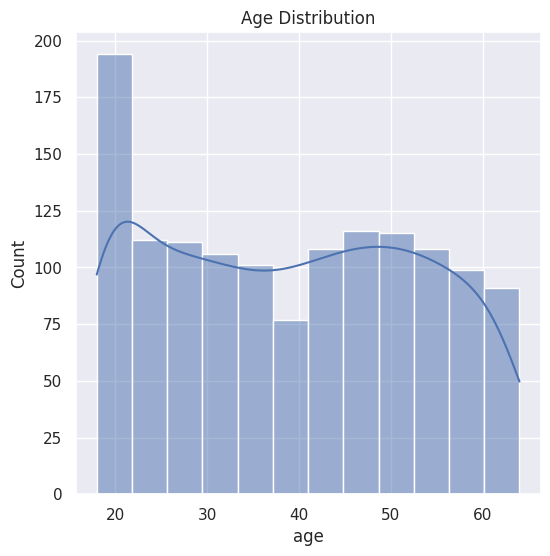

In [14]:
#distribution of age Value
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_data['age'],kde=True)
plt.title('Age Distribution')
plt.show()


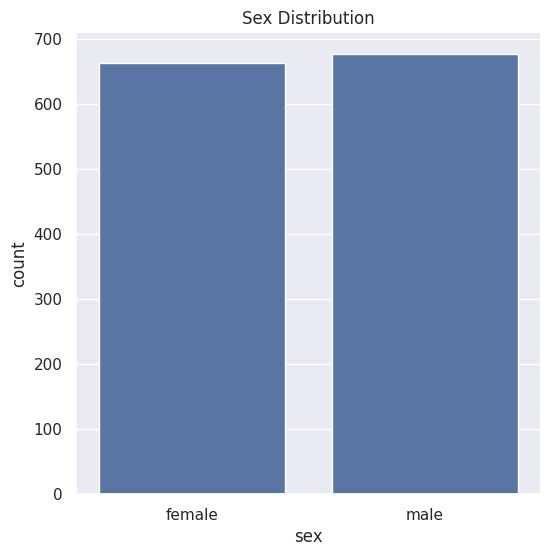

In [10]:
#Gender Column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_data)
plt.title('Sex Distribution')
plt.show()

In [11]:
insurance_data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

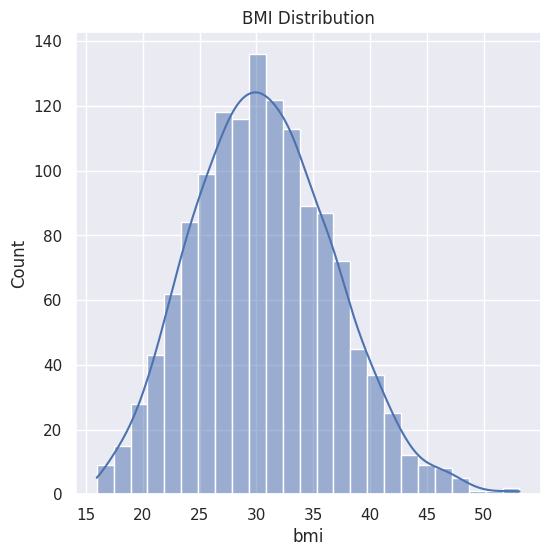

In [15]:
#Bmi distibution
plt.figure(figsize=(6,6))
sns.histplot(insurance_data['bmi'],kde=True)
plt.title('BMI Distribution')
plt.show()
#

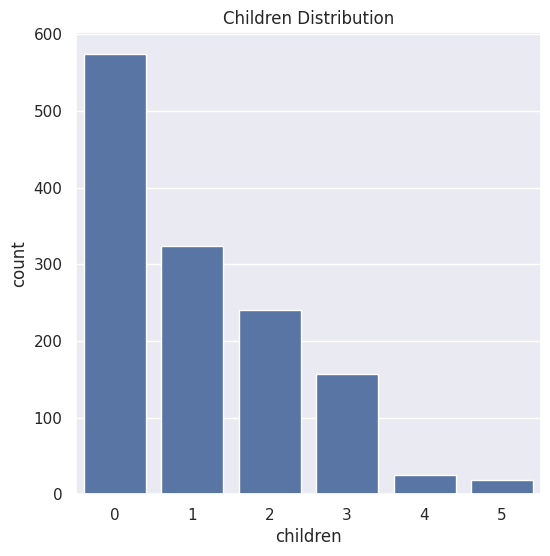

In [16]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_data)
plt.title('Children Distribution')
plt.show()

In [17]:
insurance_data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

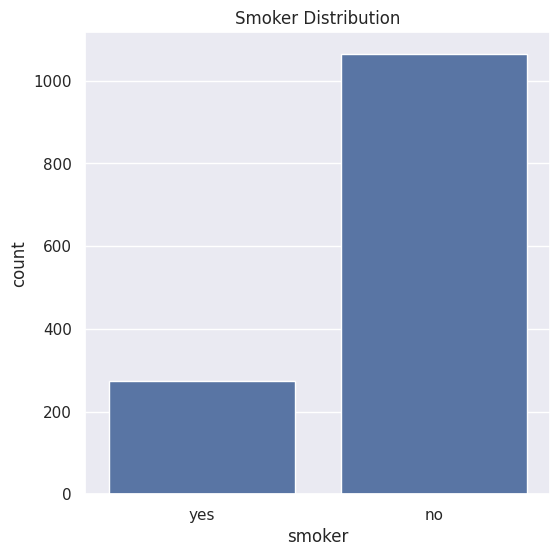

In [18]:
#smoker columns
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_data)
plt.title('Smoker Distribution')
plt.show()
#

In [19]:
insurance_data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

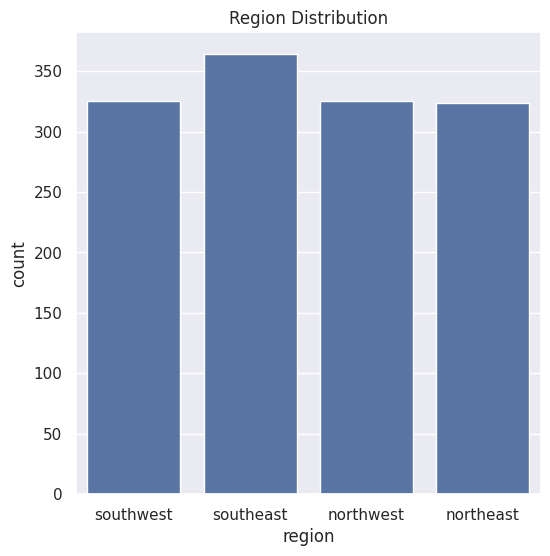

In [20]:
#region columns
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_data)
plt.title('Region Distribution')
plt.show()

In [21]:
insurance_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

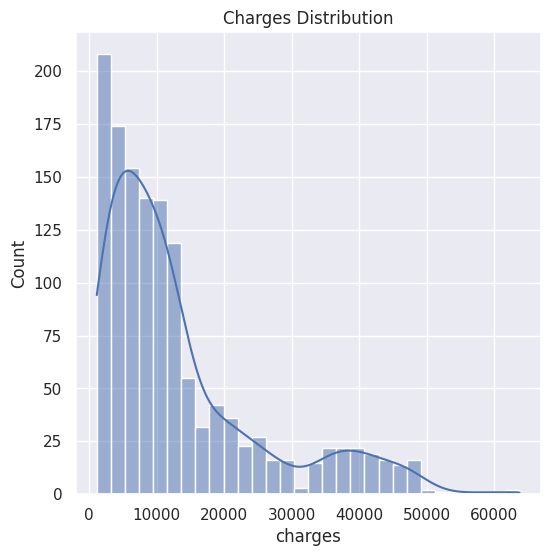

In [22]:
# Charges values
plt.figure(figsize=(6,6))
sns.histplot(insurance_data['charges'],kde=True)
plt.title('Charges Distribution')
plt.show()

**Data PreProcessing**

In [25]:
#Encoding sex column
insurance_data.replace({'sex':{'male':0,'female':1}},inplace=True)

#Encoding Smoker column
insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)

#Encoding Region column
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

**Spliting Features and Target**

In [26]:
X=insurance_data.drop(columns='charges',axis=1)
Y=insurance_data['charges']

In [27]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [28]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


**Spliting Training and Testing data**

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [30]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


**Model Building**

In [31]:
Linear_reg=LinearRegression()

In [42]:
Linear_reg.fit(X_train,Y_train)

LinearRegression()

**Model Evaluation**

In [43]:
#Prediction on Training data
prediction_on_training_data=Linear_reg.predict(X_train)

In [34]:
#R sqaurred
r2_train=metrics.r2_score(Y_train,prediction_on_training_data)
print('R squared value :',r2_train)

R squared value : 0.751505643411174


In [35]:
#Prediction on test data
prediction_on_test_data=Linear_reg.predict(X_test)

In [36]:
r2_test=metrics.r2_score(Y_test,prediction_on_test_data)
print('R squared value :',r2_test)

R squared value : 0.7447273869684076


**Building Predictive Systems**

In [40]:
input_data=(31,1,25.74,0,1,0)
#changing  input_data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=Linear_reg.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is  ',prediction[0])

[3760.0805765]
The insurance cost is   3760.080576496057


Through the application of machine learning models, particularly regression techniques, this project has successfully demonstrated the ability to predict medical insurance costs based on various personal attributes. By accurately estimating insurance premiums, this predictive model can aid both insurance companies and consumers in making informed decisions about healthcare coverage. Moving forward, further refinement of the model with additional data and ongoing validation will be crucial to ensuring its robustness and reliability in real-world applications.

## **Thank You!**